In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
import string

In [3]:
import re

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')

In [6]:
dataset.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


## General Info of Data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Data Cleaning

+ drop user Name and Screen Name

+ clean Location and Time for visualization work

+ clean OriginalTweet

In [8]:
tweets = dataset['OriginalTweet']

In [9]:
#show some tweets
tweets.values[:20]

array(['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
       'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
       "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
       "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The 

In [10]:
#remove punctuation, remove marks, remove urls, lower case, remove stop words, remove numbers, remove lowercase, remove ascii charachters
def removePuncStr(s):
    for c in string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§':
        s = s.replace(c, ' ').strip()
    return s

def removePunc(array):
    return [removePuncStr(str_) for str_ in array]

#remove numbers
def removeNumbersStr(s):
    for d in range(10):
        s = s.replace(str(d), ' ')
    return s

def removeNumbers(array):
    return [removeNumbersStr(str_) for str_ in array]

#Lemmatization
# import spacy
# nlp = spacy.load('en_core_web_sm')
# def LemmatizeStr(s):
#     doc = nlp(str(s))
#     h = ''
#     for token in doc:
#         h = h + ' ' + str(token.lemma)
#     return h

# def Lemmatize(array):
    # return [LemmatizeStr(sent) for sent in array]    
    
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + WNlemmatizer.lemmatize(w)
        lemmatized_text.append(h2)
    return lemmatized_text

def stopText(array):
    stop_words =set(stopwords.words('english'))
    stop_words.add('corona')
    stop_words.add('covid')
    stop_words.add('coronavirus')
    stopped_text = []
    for h in array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

def removeSpacesStr(s):
    spaces = ['\t', '\r', '\n']
    for space in spaces:
        s = s.replace(space, ' ')
        
def removeSpaces(array):
    return [removeNumbersStr(sent) for sent in array]

def Lowercase(array):
    return [str(sent).lower() for sent in array]

def removeUrl(text_array):
    pattern = r"https://.+\S*"
    removed = []
    for s in text_array:
        s = re.sub(pattern, ' ', s)
        removed.append(s)
    return removed
def removeAscii(text_array):
    return [re.sub(r'[^\x00-\x7f]', '', s) for s in text_array]

In [11]:
def clean(text_array):
    text_array = removeUrl(text_array)
    text_array = removePunc(text_array)
    text_array = removeNumbers(text_array)
    text_array = removeSpaces(text_array)
    text_array = Lowercase(text_array)
    text_array = lemmatize(text_array)
    text_array = removeAscii(text_array)
    return text_array

In [12]:
cleaned_tweet = clean(tweets.values)
cleaned_tweet[:50]

[' menyrbie phil gahan chrisitv',
 ' advice talk to your neighbour family to exchange phone number create contact list with phone number of neighbour school employer chemist gp set up online shopping account if po adequate supply of regular med but not over order',
 ' coronavirus australia woolworth to give elderly disabled dedicated shopping hour amid covid outbreak',
 ' my food stock is not the only one which is empty please don t panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 ' me ready to go at supermarket during the covid outbreak not because i m paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please don t panic it cause shortage coronavirusfrance restezchezvous stayathome confinement',
 ' a news of the regions first confirmed covid case came out of sullivan county last week people flocked to are

In [13]:
dataset['cleaned_text'] = cleaned_tweet

In [14]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbour family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is em...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covi...


## Some descriptive Analysis & Visialization

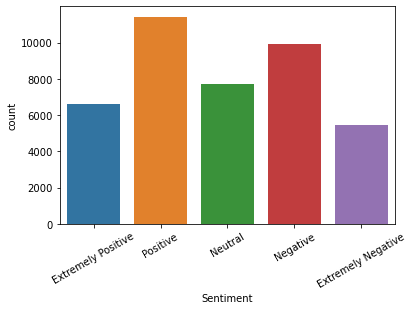

In [15]:
### Distribution of labels
ax = sns.countplot(data=dataset, x='Sentiment', order=['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()

In [23]:
dataset['Location'].fillna('Unknown')

0                              London
1                                  UK
2                           Vagabonds
3                             Unknown
4                             Unknown
                     ...             
41152    Wellington City, New Zealand
41153                         Unknown
41154                         Unknown
41155                         Unknown
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object

<Figure size 1440x1440 with 0 Axes>

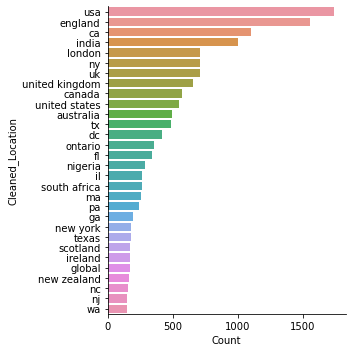

In [16]:
# clean Location column
def extract_location(s):
    s = str(s).split(',')
    if(len(s) == 1):
        loc = s[0]
    else:
        loc = s[-1]
    
    for punc in string.punctuation:
        if(punc in loc):
            loc = 'Unknown'
    
    if(len(loc) > 15):
        loc = 'Unknown'
    return loc.lower().strip()

dataset['Cleaned_Location'] = dataset['Location'].fillna('Unknown').map(extract_location)

Location_count = dataset.groupby(by=['Cleaned_Location'], as_index=False).agg({'UserName': 'count'}).sort_values(by=['UserName'],ascending=False).rename({'UserName': 'Count'}, axis=1)
top_30_loc = Location_count[1:31]

plt.figure(figsize=(20, 20))
ax = sns.catplot(data=top_30_loc, x='Count', y='Cleaned_Location', kind='bar')

In [17]:
### Show distribution of time people tweeting
dataset['Date'] = pd.to_datetime(dataset['TweetAt'], format='%d-%m-%Y')
dataset['YearMonth'] = dataset['Date'].apply(lambda x: str(x)[:7])

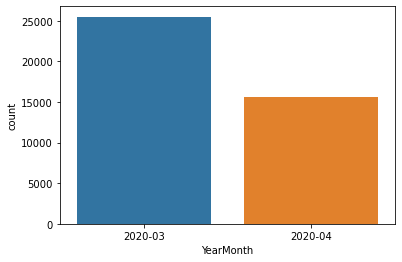

In [18]:
ax = sns.countplot(data=dataset, x='YearMonth')

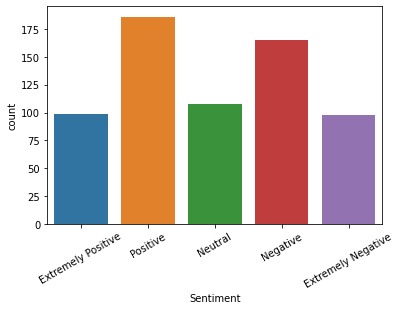

In [33]:
# 2020-03
ax = sns.countplot(data=dataset[dataset['Date'] == dataset['Date'].unique()[0]], x='Sentiment', order=['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()

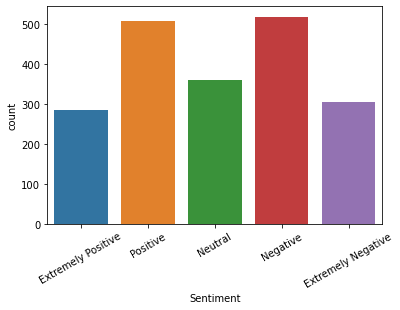

In [34]:
# 2020-04
ax = sns.countplot(data=dataset[dataset['Date'] == dataset['Date'].unique()[1]], x='Sentiment', order=['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()

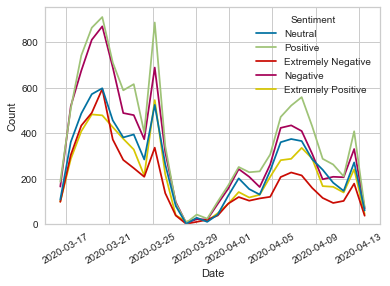

In [28]:
# Fluctuation of the sentiments
ax = sns.histplot(data=dataset, x='Date', hue='Sentiment', multiple='layer', element='poly', fill=False)
plt.xticks(rotation=30)
plt.show()

In [29]:
to_replace = {'Positive': 'Positive', 'Extremely Positive': 'Positive', 'Negative':'Negative', 'Extremely Negative': 'Negative', 'Neutral' : 'Neutral'}
dataset['Total_Sent'] = dataset['Sentiment'].map(to_replace)

In [30]:
## Word Cloud
positive_block = dataset[dataset['Total_Sent'] == 'Positive']['cleaned_text']
negative_block = dataset[dataset['Total_Sent'] == 'Negative']['cleaned_text']

## remove stop words
stopped_positive = stopText(positive_block.values)
stopped_negative = stopText(negative_block.values)

In [31]:
import wordcloud

In [32]:
positive_text = ''.join(list(stopped_positive))
negative_text = ''.join(list(stopped_negative))

(-0.5, 399.5, 199.5, -0.5)

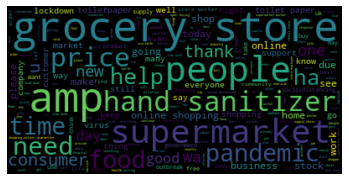

In [33]:
#word cloud for Positive Tweet
word_cloud = wordcloud.WordCloud().generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

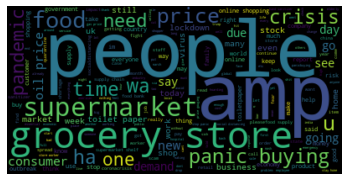

In [34]:
# word cloud for negative tweet
word_cloud = wordcloud.WordCloud().generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

## Benchmark : Countvectorizer, LogisticRegression and GridSearch

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline

In [37]:
# Prepare data for classification
le = LabelEncoder()
def makeDataset(dataset, is_train=True):
    #clean data
    dataset['Cleaned_Text'] = clean(dataset['OriginalTweet'])
    #remove stop words
    dataset['Cleaned_Text'] = stopText(dataset['Cleaned_Text'])
    #encoding labels
    if(is_train):
        dataset['Label'] = le.fit(dataset['Sentiment']).transform(dataset['Sentiment'])
    else:
        dataset['Label'] = le.transform(dataset['Sentiment'])
    data = dataset[['Cleaned_Text', 'Label']]
    return data

train_set = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
test_set = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')

train_set = makeDataset(train_set)
test_set = makeDataset(test_set, is_train=False)

X_train, y_train = train_set['Cleaned_Text'], train_set['Label']
X_test, y_test = test_set['Cleaned_Text'], test_set['Label']

In [40]:
list(le.inverse_transform(range(5)))

['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']

In [204]:
# create a pipeline
base_pipeline = make_pipeline(CountVectorizer(max_features=10000), LogisticRegression(n_jobs=-1))

In [205]:
base_pipeline.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer(max_features=10000)),
  ('logisticregression', LogisticRegression(n_jobs=-1))],
 'verbose': False,
 'countvectorizer': CountVectorizer(max_features=10000),
 'logisticregression': LogisticRegression(n_jobs=-1),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': 10000,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'logisticregression__C': 1.0,
 'logisticregression__class_

In [206]:
params_grid = {
    'countvectorizer__min_df': [2,5,10],
    'countvectorizer__max_df': [0.6, 0.8, 1],
    'countvectorizer__ngram_range':[(1,1), (1,2), (2,2)],
    'logisticregression__C' : [0.1, 1, 10],
}

In [207]:
#Use GridSearch for good parameters
grid = GridSearchCV(base_pipeline, params_grid, n_jobs=-1, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.58097053 0.60155025 0.58864835 0.57482335 0.58162649 0.56488564
 0.35073004 0.36214961 0.35179904 0.58118923 0.60181753 0.5896688
 0.57441028 0.58058169 0.56447273 0.35026835 0.36205241 0.35182336
 0.58007155 0.60621537 0.59467431 0.57431312 0.58250126 0.5664408
 0.33892171 0.34684231 0.34222596 0.58097053 0.60155025 0.58864835
 0.57482335 0.58162649 0.56488564 0.35073004 0.36214961 0.35179904
 0.58118923 0.60181753 0.5896688  0.57441028 0.58058169 0.56447273
 0.35026835 0.36205241 0.35182336 0.58007155 0.60621537 0.59467431
 0.57431312 0.58250126 0.5664408  0.33892171 0.34684231 0.34222596
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=10000)),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.6, 0.8, 1],
                         'countvectorizer__min_df': [2, 5, 10],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'logisticregression__C': [0.1, 1, 10]},
             return_train_score=True)

In [208]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__max_df,param_countvectorizer__min_df,param_countvectorizer__ngram_range,param_logisticregression__C,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.030451,0.054833,0.200531,0.013724,0.6,2,"(1, 1)",0.1,"{'countvectorizer__max_df': 0.6, 'countvectori...",0.572643,...,0.580971,0.004682,19,0.756598,0.754563,0.755664,0.753751,0.750987,0.754313,0.001923
1,5.111369,0.043128,0.181731,0.002801,0.6,2,"(1, 1)",1,"{'countvectorizer__max_df': 0.6, 'countvectori...",0.599004,...,0.601550,0.002355,5,0.891845,0.889628,0.888811,0.885956,0.884893,0.888227,0.002516
2,4.266542,0.734504,0.172705,0.010031,0.6,2,"(1, 1)",10,"{'countvectorizer__max_df': 0.6, 'countvectori...",0.588071,...,0.588648,0.001950,11,0.931845,0.932726,0.934793,0.930480,0.927413,0.931452,0.002458
3,7.323866,0.057134,0.304118,0.025434,0.6,2,"(1, 2)",0.1,"{'countvectorizer__max_df': 0.6, 'countvectori...",0.567541,...,0.574823,0.004535,25,0.772635,0.771086,0.771731,0.772156,0.769028,0.771327,0.001257
4,7.217108,0.114748,0.300523,0.023185,0.6,2,"(1, 2)",1,"{'countvectorizer__max_df': 0.6, 'countvectori...",0.580418,...,0.581626,0.003111,15,0.902384,0.902992,0.902903,0.903025,0.900838,0.902429,0.000828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1.756954,0.024383,0.000000,0.000000,1,10,"(1, 2)",1,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,...,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,1.796012,0.062284,0.000000,0.000000,1,10,"(1, 2)",10,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,...,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,1.284484,0.014235,0.000000,0.000000,1,10,"(2, 2)",0.1,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,...,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,1.277110,0.106339,0.000000,0.000000,1,10,"(2, 2)",1,"{'countvectorizer__max_df': 1, 'countvectorize...",NaN,...,NaN,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
grid.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.6, max_features=10000, min_df=10)),
                ('logisticregression', LogisticRegression(C=1, n_jobs=-1))])

In [210]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(np.mean(y_pred == y_test))

0.5995260663507109


## Improvement 1: More powerful Machine Learning model - LightGBM

In [219]:
## Using LightGBM to train
import lightgbm as lgb

params = {
    'n_estimators' : 500,
    'boosting_type' : 'gbdt'
}


pipeline2 = make_pipeline(CountVectorizer(max_features=10000, dtype=np.float32), lgb.LGBMClassifier(**params))

pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)
print(np.mean(y_pred==y_test))

0.6137440758293838


## Visualizing docs

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer

labels = le.inverse_transform(range(5))
# labels
reversed_label_map = {i: label for i, label in zip(range(5), labels)}

tfv = TfidfVectorizer()
X = tfv.fit_transform(X_train)
y = y_train.map(reversed_label_map)

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
tsne = TSNEVisualizer(decompose_by=200, random_state=111)
tsne.fit(X[:200], y[:200])
tsne.show(outpath='tsne_cluster.png')

In [135]:
## To do:
## Word2Vec
## Doc2Vec
## Transformers


## Improvement 2: Word2Vec, train Word2Vec and use Pre-Trained Word2Vec model

### Train a Word2Vec Model

In [136]:
## Word2Vec

import gensim
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)



In [137]:
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])

X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

C:\Users\shiju\AppData\Local\Temp/ipykernel_18072/2090698330.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
C:\Users\shiju\AppData\Local\Temp/ipykernel_18072/2090698330.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [138]:
# Accuracy
lr = LogisticRegression()
lrm = lr.fit(X_train_vect_avg, y_train)
y_pred = lrm.predict(X_test_vect_avg)
print(np.mean(y_pred==y_test))

0.27330173775671407


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Use Pre-Trained Word2Vec

In [139]:
### using pretrained model
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [140]:
pre_trained_model = gensim.downloader.load('glove-twitter-200')

In [141]:
print(pre_trained_model['king'].shape)

(200,)


In [142]:
# def transform_word_to_embedding(text_array: list):
#     return np.array([[pre_trained_model[i] for i in text if i in words] for text in text_array])

# def compute_mean_vec(embedding_array: list)->list:
#     '''
#     input:
#     [
#     [[1,1,1,1,1,...], [2,2,2,2.....]],
#     [[1,1,1,1,1,...], [2,2,2,2.....], [3,3,3,3.....]],
#     ]
#     output:
#     [
#     [1.5,1.5,1.5],
#     [2,2,2],
#     ]
#     '''
#     embedding_mean_vec = []
#     for embeddings in embedding_array:
#         if embeddings.size:
#             embedding_mean_vec.append(embeddings.mean(axis=0))
#         else:
#             embedding_mean_vec.append(np.zeros(100, dtype=float))
#     return embedding_mean_vec

In [143]:
words = set(pre_trained_model.index_to_key)
X_train_vect = np.array([np.array([pre_trained_model[i] for i in ls if i in words])
                         for ls in X_train])

X_test_vect = np.array([np.array([pre_trained_model[i] for i in ls if i in words])
                         for ls in X_test])

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(200, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(200, dtype=float))

C:\Users\shiju\AppData\Local\Temp/ipykernel_18072/3890695353.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([pre_trained_model[i] for i in ls if i in words])
C:\Users\shiju\AppData\Local\Temp/ipykernel_18072/3890695353.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([pre_trained_model[i] for i in ls if i in words])


In [144]:
lr = LogisticRegression()
lrm = lr.fit(X_train_vect_avg, y_train)
y_pred = lrm.predict(X_test_vect_avg)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
# Accuracy
print(np.mean(y_pred == y_test))

0.2717219589257504


## Why Low Acuuracy?

+ Small number of samples
+ Model is not powerful enough